In [81]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
import random

# random seed
tf.random.set_seed(2)
random.seed(2)
np.random.seed(2)

## Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ + Resize ÌïòÍ∏∞

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # ÌååÏùºÎßàÎã§ Î™®Îëê 28x28 ÏÇ¨Ïù¥Ï¶àÎ°ú Î∞îÍæ∏Ïñ¥ Ï†ÄÏû•Ìï©ÎãàÎã§.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

    

image_dir_path = os.getenv("HOME") + "/aiffel/data_rsp/scissor"
resize_images(image_dir_path)
print("Í∞ÄÏúÑ Ïù¥ÎØ∏ÏßÄ resize ÏôÑÎ£å!")

image_dir_path = os.getenv("HOME") + "/aiffel/data_rsp/rock"
resize_images(image_dir_path)
print("Î∞îÏúÑ Ïù¥ÎØ∏ÏßÄ resize ÏôÑÎ£å!")

image_dir_path = os.getenv("HOME") + "/aiffel/data_rsp/paper"
resize_images(image_dir_path)
print("Î≥¥ Ïù¥ÎØ∏ÏßÄ resize ÏôÑÎ£å!")

2574  images to be resized.
2574  images resized.
Í∞ÄÏúÑ Ïù¥ÎØ∏ÏßÄ resize ÏôÑÎ£å!
2482  images to be resized.
2482  images resized.
Î∞îÏúÑ Ïù¥ÎØ∏ÏßÄ resize ÏôÑÎ£å!
2796  images to be resized.
2796  images resized.
Î≥¥ Ïù¥ÎØ∏ÏßÄ resize ÏôÑÎ£å!


In [3]:

def load_data(img_path, number_of_data=300): # Ï¥ùÌï©Ïóê Ï£ºÏùò!
    # Í∞ÄÏúÑ : 0, Î∞îÏúÑ : 1, Î≥¥ : 2
    img_size=28
    color=3
    #Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ÏôÄ ÎùºÎ≤®(Í∞ÄÏúÑ : 0, Î∞îÏúÑ : 1, Î≥¥ : 2) Îç∞Ïù¥ÌÑ∞Î•º Îã¥ÏùÑ ÌñâÎ†¨(matrix) ÏòÅÏó≠ÏùÑ ÏÉùÏÑ±Ìï©ÎãàÎã§.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Îç∞Ïù¥ÌÑ∞ ÏòÅÏó≠Ïóê Ïù¥ÎØ∏ÏßÄ ÌñâÎ†¨ÏùÑ Î≥µÏÇ¨
        labels[idx]=0   # Í∞ÄÏúÑ : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Îç∞Ïù¥ÌÑ∞ ÏòÅÏó≠Ïóê Ïù¥ÎØ∏ÏßÄ ÌñâÎ†¨ÏùÑ Î≥µÏÇ¨
        labels[idx]=1   # Î∞îÏúÑ : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # Îç∞Ïù¥ÌÑ∞ ÏòÅÏó≠Ïóê Ïù¥ÎØ∏ÏßÄ ÌñâÎ†¨ÏùÑ Î≥µÏÇ¨
        labels[idx]=2   # Î≥¥ : 2
        idx=idx+1
        
    print("ÌïôÏäµÎç∞Ïù¥ÌÑ∞(x_train)Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎäî", idx,"ÏûÖÎãàÎã§.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/data_rsp"
(x_train, y_train)=load_data(image_dir_path, 7852)
x_train_norm = x_train/255.0   # ÏûÖÎ†•ÏùÄ 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

ÌïôÏäµÎç∞Ïù¥ÌÑ∞(x_train)Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎäî 7852 ÏûÖÎãàÎã§.
x_train shape: (7852, 28, 28, 3)
y_train shape: (7852,)


### Îç∞Ïù¥ÌÑ∞Ïùò Îã§ÏñëÏÑ±
Î™®Îç∏Ïùò ÏùºÎ∞òÌôî Îä•Î†•ÏùÑ ÎÜíÍ≤å ÌïôÏäµÏãúÌÇ§Í∏∞ ÏúÑÌï¥ ÌïôÏäµÎç∞Ïù¥ÌÑ∞Î•º ÌôîÎ©¥ÏÉÅ ÏÜê ÏúÑÏπò, Î∞∞Í≤Ω, ÏÜêÏùò Ï∂úÌòÑ Í∞ÅÎèÑÎ•º Îã§ÏñëÌïòÍ≤å Íµ¨ÏÑ±ÌïòÏòÄÏäµÎãàÎã§.

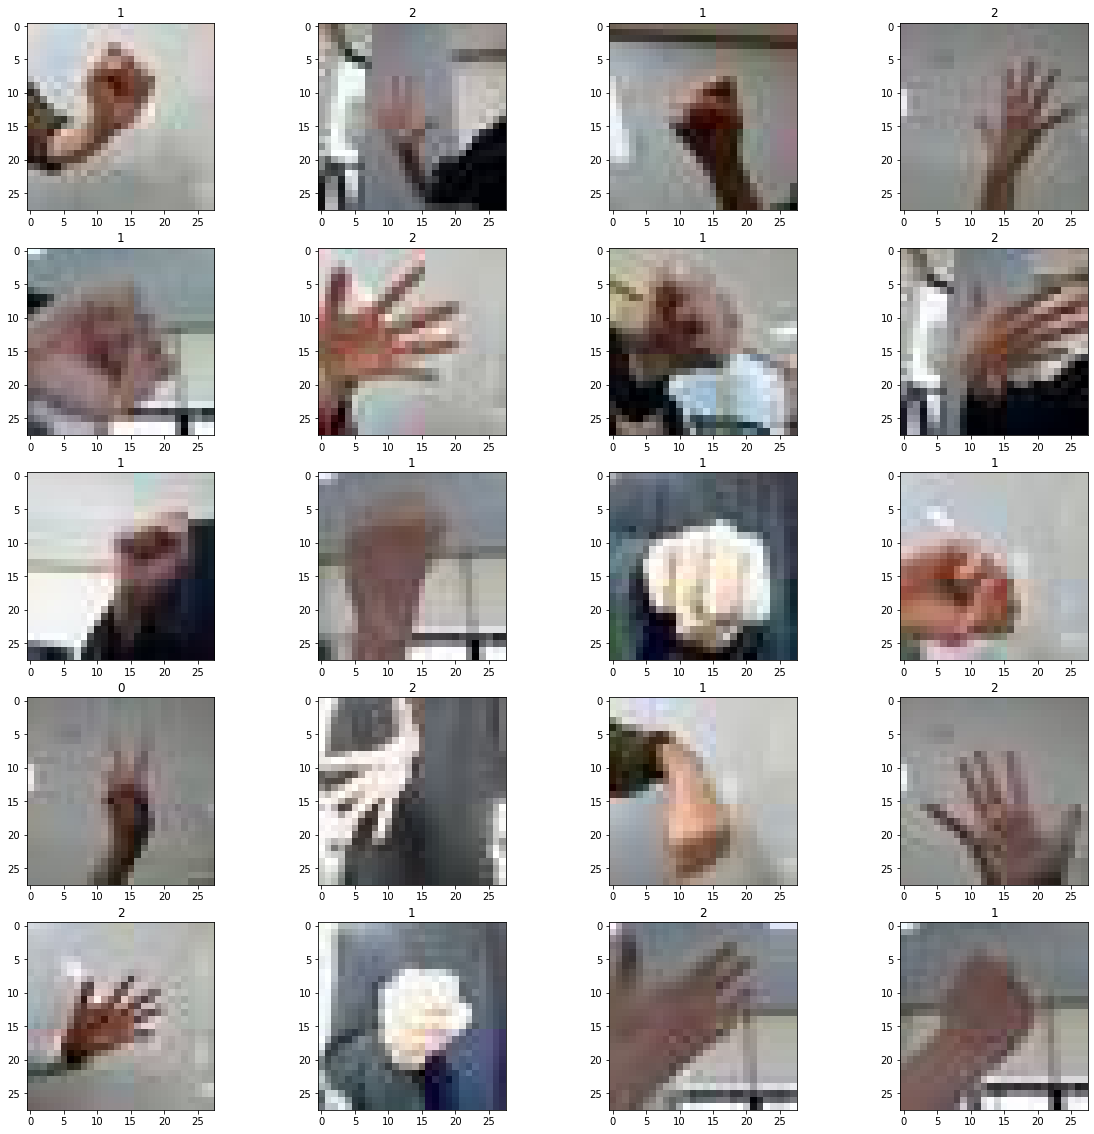

In [85]:
fig = plt.figure(figsize=(20, 20))
for i in range(5): 
    for j in range(4):
        ax = fig.add_subplot(5,4, 4*i+j+1)
        n = random.randint(0, 7000)
        ax.imshow(x_train[n])
        ax.set_title(y_train[n])

## Î™®Îç∏ ÎßåÎì§Í∏∞

In [73]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

def make_model():
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
    model.add(keras.layers.MaxPool2D(2,2))
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(16, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))

    return model

## Î™®Îç∏ ÌïôÏäµ

In [35]:
def train_graph(history, title='title'):
    loss_ax = plt.subplot(211)

    loss_ax.plot(history['loss'], 'y', label='train loss')
    loss_ax.plot(history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='best')
    plt.title(title+' loss')
    plt.show()
    
    acc_ax = plt.subplot(212)
    acc_ax.plot(history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='best')
    plt.title(title+' accuracy')    
    plt.show()

### batch size 8, 16, 32, 64, 128 Ïã§Ìóò

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_21 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 16)              

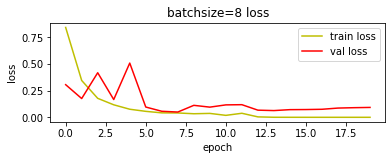

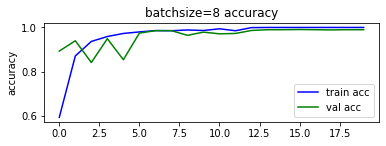

In [57]:
model = make_model()
model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_train_norm, y_train, epochs=20,
          batch_size=8,validation_split=0.15, shuffle=True, verbose=1)
train_graph(hist.history, 'batchsize=8')

Epoch 1/20
418/418 [==============================] - 2s 4ms/step - loss: 0.8282 - accuracy: 0.6251 - val_loss: 0.4962 - val_accuracy: 0.7980
Epoch 2/20
418/418 [==============================] - 1s 4ms/step - loss: 0.4140 - accuracy: 0.8460 - val_loss: 0.2387 - val_accuracy: 0.9058
Epoch 3/20
418/418 [==============================] - 1s 3ms/step - loss: 0.2469 - accuracy: 0.9131 - val_loss: 0.4706 - val_accuracy: 0.8158
Epoch 4/20
418/418 [==============================] - 1s 4ms/step - loss: 0.1714 - accuracy: 0.9410 - val_loss: 0.1775 - val_accuracy: 0.9304
Epoch 5/20
418/418 [==============================] - 1s 4ms/step - loss: 0.1205 - accuracy: 0.9550 - val_loss: 0.0788 - val_accuracy: 0.9711
Epoch 6/20
418/418 [==============================] - 1s 3ms/step - loss: 0.0839 - accuracy: 0.9720 - val_loss: 0.0939 - val_accuracy: 0.9576
Epoch 7/20
418/418 [==============================] - 1s 3ms/step - loss: 0.0701 - accuracy: 0.9739 - val_loss: 0.1079 - val_accuracy: 0.9652
Epoch 

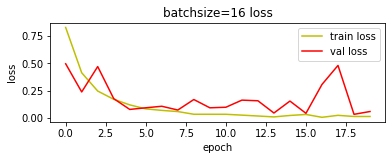

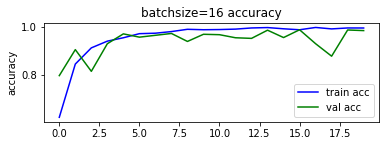

In [58]:
model = make_model()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_train_norm, y_train, epochs=20,
          batch_size=16,validation_split=0.15, shuffle=True, verbose=1)
train_graph(hist.history, 'batchsize=16')

Epoch 1/20
209/209 [==============================] - 1s 4ms/step - loss: 0.8974 - accuracy: 0.5775 - val_loss: 0.8180 - val_accuracy: 0.6239
Epoch 2/20
209/209 [==============================] - 1s 4ms/step - loss: 0.4922 - accuracy: 0.8079 - val_loss: 0.4080 - val_accuracy: 0.8302
Epoch 3/20
209/209 [==============================] - 1s 4ms/step - loss: 0.3285 - accuracy: 0.8806 - val_loss: 0.4582 - val_accuracy: 0.8251
Epoch 4/20
209/209 [==============================] - 1s 4ms/step - loss: 0.2413 - accuracy: 0.9149 - val_loss: 0.4474 - val_accuracy: 0.8268
Epoch 5/20
209/209 [==============================] - 1s 4ms/step - loss: 0.1780 - accuracy: 0.9371 - val_loss: 0.2590 - val_accuracy: 0.8930
Epoch 6/20
209/209 [==============================] - 1s 4ms/step - loss: 0.1335 - accuracy: 0.9552 - val_loss: 0.1218 - val_accuracy: 0.9550
Epoch 7/20
209/209 [==============================] - 1s 4ms/step - loss: 0.1059 - accuracy: 0.9642 - val_loss: 0.1181 - val_accuracy: 0.9618
Epoch 

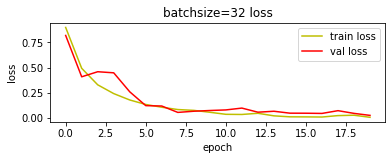

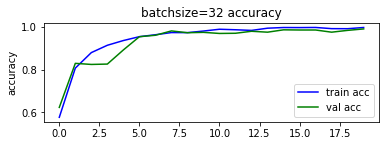

In [59]:
model = make_model()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_train_norm, y_train, epochs=20,
          batch_size=32,validation_split=0.15, shuffle=True, verbose=1)
train_graph(hist.history, 'batchsize=32')

Epoch 1/20
105/105 [==============================] - 1s 5ms/step - loss: 1.0344 - accuracy: 0.4528 - val_loss: 0.9374 - val_accuracy: 0.6732
Epoch 2/20
105/105 [==============================] - 0s 4ms/step - loss: 0.7387 - accuracy: 0.7047 - val_loss: 0.8371 - val_accuracy: 0.6409
Epoch 3/20
105/105 [==============================] - 0s 4ms/step - loss: 0.4712 - accuracy: 0.8156 - val_loss: 0.7726 - val_accuracy: 0.6817
Epoch 4/20
105/105 [==============================] - 0s 4ms/step - loss: 0.3360 - accuracy: 0.8741 - val_loss: 0.4089 - val_accuracy: 0.8336
Epoch 5/20
105/105 [==============================] - 0s 4ms/step - loss: 0.2620 - accuracy: 0.9037 - val_loss: 0.2606 - val_accuracy: 0.8990
Epoch 6/20
105/105 [==============================] - 0s 4ms/step - loss: 0.2049 - accuracy: 0.9309 - val_loss: 0.1708 - val_accuracy: 0.9448
Epoch 7/20
105/105 [==============================] - 0s 4ms/step - loss: 0.1744 - accuracy: 0.9399 - val_loss: 0.2090 - val_accuracy: 0.9261
Epoch 

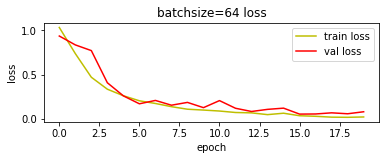

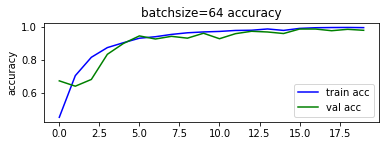

In [60]:
model = make_model()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_train_norm, y_train, epochs=20,
          batch_size=64, validation_split=0.15, shuffle=True, verbose=1)
train_graph(hist.history, 'batchsize=64')

Epoch 1/20
53/53 [==============================] - 1s 7ms/step - loss: 1.0385 - accuracy: 0.4657 - val_loss: 1.1634 - val_accuracy: 0.3234
Epoch 2/20
53/53 [==============================] - 0s 5ms/step - loss: 0.7303 - accuracy: 0.7089 - val_loss: 1.3404 - val_accuracy: 0.3820
Epoch 3/20
53/53 [==============================] - 0s 4ms/step - loss: 0.5102 - accuracy: 0.8061 - val_loss: 0.9380 - val_accuracy: 0.5840
Epoch 4/20
53/53 [==============================] - 0s 4ms/step - loss: 0.3849 - accuracy: 0.8614 - val_loss: 0.4655 - val_accuracy: 0.8277
Epoch 5/20
53/53 [==============================] - 0s 4ms/step - loss: 0.3390 - accuracy: 0.8776 - val_loss: 0.2684 - val_accuracy: 0.9168
Epoch 6/20
53/53 [==============================] - 0s 4ms/step - loss: 0.2875 - accuracy: 0.9031 - val_loss: 0.2275 - val_accuracy: 0.9177
Epoch 7/20
53/53 [==============================] - 0s 4ms/step - loss: 0.2566 - accuracy: 0.9132 - val_loss: 0.2454 - val_accuracy: 0.9194
Epoch 8/20
53/53 [==

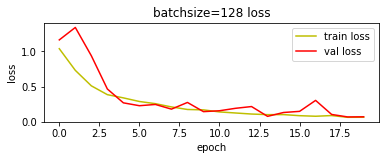

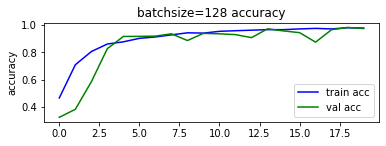

In [61]:
model = make_model()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_train_norm, y_train, epochs=20,
          batch_size=128,validation_split=0.15, shuffle=True)
train_graph(hist.history, 'batchsize=128')

### Í¥ÄÏ∞∞
batchsizeÍ∞Ä 8, 16, 128ÏóêÏÑúÎäî val lossÍ∞Ä ÌÅ¨Í≤å Îì§Ïë•ÎÇ†Ïë•Ìïú Î™®ÏäµÏùÑ Î≥¥ÏûÖÎãàÎã§. batchsize 32, 64ÏóêÏÑúÎäî val lossÍ∞Ä ÎπÑÍµêÏ†Å ÏïàÏ†ïÏ†ÅÏù¥Í≥† epoch 10\~15 ÏÇ¨Ïù¥Ïóê val lossÍ∞Ä ÏµúÍ≥†ÏπòÏóê ÎèÑÎã¨Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú batchsizeÎäî 32 ÎòêÎäî 64Î•º Ïì∞Í≥† Ïò§Î≤ÑÌîºÌåÖÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ epoch 10\~15ÍπåÏßÄÎßå Ìä∏Î†àÏù¥ÎãùÌïòÎäîÍ≤å Ï†ÅÏ†àÌï† Í≤ÉÏûÖÎãàÎã§.

## Test Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Í∏∞

In [62]:
image_dir_path = os.getenv("HOME") + "/aiffel/data_rsp/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/data_rsp/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/data_rsp/test/paper"
resize_images(image_dir_path)

214  images to be resized.
214  images resized.
212  images to be resized.
212  images resized.
246  images to be resized.
246  images resized.


In [63]:
image_dir_path = os.getenv("HOME") + "/aiffel/data_rsp/test"
(x_test, y_test)=load_data(image_dir_path, 214+212+246)
x_test_norm = x_test/255.0   # ÏûÖÎ†•ÏùÄ 0~1 ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú Ï†ïÍ∑úÌôî

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

ÌïôÏäµÎç∞Ïù¥ÌÑ∞(x_train)Ïùò Ïù¥ÎØ∏ÏßÄ Í∞úÏàòÎäî 672 ÏûÖÎãàÎã§.
x_test shape: (672, 28, 28, 3)
y_test shape: (672,)


In [64]:
model.evaluate(x_test_norm, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 2.3234 - accuracy: 0.5908


[2.323408603668213, 0.5907738208770752]

## Î™®Îç∏ ÎπåÎìú & ÌïôÏäµ & ÌèâÍ∞Ä

Îç∞Ïù¥ ÌÑ∞Î•º Îã§ÏñëÌôî ÌñàÏßÄÎßå training setÏóêÏÑú 99.9%Ïóê Îã¨ÌïòÎäî Ï†ïÌôïÎèÑÍ∞Ä val/test Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑúÎäî Ïú†ÏßÄÎêòÏßÄ ÏïäÏäµÎãàÎã§. Ïù¥Îü∞ Ïò§Î≤ÑÌîºÌåÖÏùÑ Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Î∞∞Ïπò Ï†ïÍ∑úÌôîÎ•º ConvÎ†àÏù¥Ïñ¥ Îí§Ïóê Ï†ÅÏö©Ìï¥Ï§çÎãàÎã§.

In [75]:

def make_model():
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3), padding='same', input_shape=(28,28,3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPool2D(2,2))
    
    model.add(keras.layers.Conv2D(32, (3,3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    
    model.add(keras.layers.Conv2D(64, (3,3)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(16, activation='relu'))
    model.add(keras.layers.Dense(3, activation='softmax'))

    return model

Epoch 1/15
209/209 [==============================] - 2s 5ms/step - loss: 0.4088 - accuracy: 0.8394 - val_loss: 3.8764 - val_accuracy: 0.0000e+00
Epoch 2/15
209/209 [==============================] - 1s 4ms/step - loss: 0.1014 - accuracy: 0.9696 - val_loss: 1.1452 - val_accuracy: 0.5951
Epoch 3/15
209/209 [==============================] - 1s 4ms/step - loss: 0.0475 - accuracy: 0.9855 - val_loss: 0.0060 - val_accuracy: 0.9992
Epoch 4/15
209/209 [==============================] - 1s 4ms/step - loss: 0.0231 - accuracy: 0.9945 - val_loss: 0.1027 - val_accuracy: 0.9593
Epoch 5/15
209/209 [==============================] - 1s 4ms/step - loss: 0.0255 - accuracy: 0.9931 - val_loss: 0.0548 - val_accuracy: 0.9779
Epoch 6/15
209/209 [==============================] - 1s 4ms/step - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.2167 - val_accuracy: 0.9126
Epoch 7/15
209/209 [==============================] - 1s 4ms/step - loss: 0.0032 - accuracy: 0.9999 - val_loss: 0.0065 - val_accuracy: 0.9975
Ep

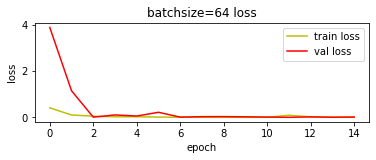

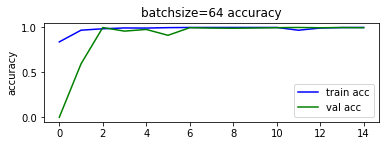





test loss & accuracy: 
21/21 [==============================] - 0s 2ms/step - loss: 3.0960 - accuracy: 0.6205


[3.0960347652435303, 0.6205357313156128]

In [77]:
model = make_model()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
hist = model.fit(x_train_norm, y_train, epochs=15,
          batch_size=32, validation_split=0.15, shuffle=True, verbose=1)
train_graph(hist.history, 'batchsize=64')
print('\n\n\n')
print('test loss & accuracy: ')
model.evaluate(x_test_norm, y_test)

62% ÏòàÏ∏°ÏÑ±Í≥µÎ•†ÏùÑ Îã¨ÏÑ±ÌñàÏäµÎãàÎã§üéâ

### Î™ª ÎßûÌûå Îç∞Ïù¥ÌÑ∞ (ÌÖåÏä§Ìä∏ÏÖã)

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [2.6935427e-09 3.0256513e-11 1.0000000e+00]
ÎùºÎ≤®: 0, ÏòàÏ∏°Í≤∞Í≥º: 2


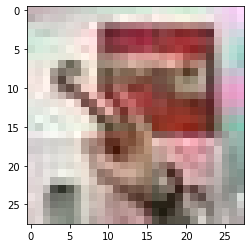

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [6.788429e-09 8.026607e-11 1.000000e+00]
ÎùºÎ≤®: 0, ÏòàÏ∏°Í≤∞Í≥º: 2


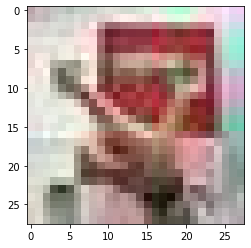

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [1.6797602e-06 4.2949116e-01 5.7050717e-01]
ÎùºÎ≤®: 1, ÏòàÏ∏°Í≤∞Í≥º: 2


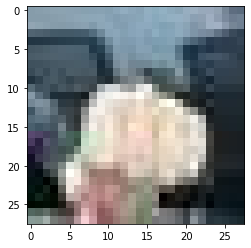

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [0.00100626 0.30303884 0.6959549 ]
ÎùºÎ≤®: 1, ÏòàÏ∏°Í≤∞Í≥º: 2


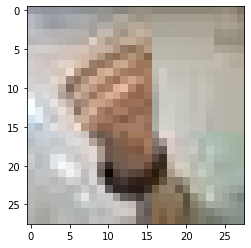

ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: [9.9972266e-01 2.7364632e-04 3.7221607e-06]
ÎùºÎ≤®: 2, ÏòàÏ∏°Í≤∞Í≥º: 0


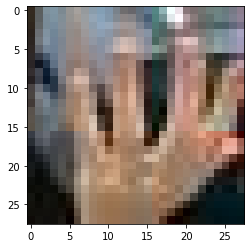

In [87]:
predicted_result = model.predict(x_test_norm)  # modelÏù¥ Ï∂îÎ°†Ìïú ÌôïÎ•†Í∞í. 
predicted_labels = np.argmax(predicted_result, axis=1)

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # iÎ≤àÏß∏ test_labelsÍ≥º y_testÏù¥ Îã§Î•∏ Í≤ΩÏö∞Îßå Î™®ÏïÑ Î¥ÖÏãúÎã§. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list ÏóêÏÑú ÎûúÎç§ÌïòÍ≤å 5Í∞úÎßå ÎΩëÏïÑÎ¥ÖÏãúÎã§.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("ÏòàÏ∏°ÌôïÎ•†Î∂ÑÌè¨: " + str(predicted_result[n]))
    print("ÎùºÎ≤®: " + str(y_test[n]) + ", ÏòàÏ∏°Í≤∞Í≥º: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## ÌöåÍ≥†

ÏõπÏ∫†ÏúºÎ°ú Ïù¥ÎØ∏ÏßÄÎ•º Ï∞çÏñ¥ Î∂ÑÎ•òÍ∏∞Î•º ÎßåÎìúÎäîÍ≤å ÏÜêÏâ¨Ïö¥ ÏÑúÎπÑÏä§Î°ú Ï†úÍ≥µÎêòÍ≥†ÏûàÎäîÍ≤ÉÏù¥ ÎÜÄÎùºÏõ†ÏäµÎãàÎã§.  
  
MNIST, CIFAR-10/100 Í∞ôÏù¥ ÎØ∏Î¶¨ Ï†úÍ≥µÎêòÎäî Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïÑÎãàÎùº ÏßÅÏ†ë ÎßåÎì† Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ Ìä∏Î†àÏù¥ÎãùÌïòÎãà ÏÇ¥ÏïÑÏûàÎäî Îî•Îü¨ÎãùÏùÑ ÌïòÎäî ÎäêÎÇåÏù¥ Îì≠ÎãàÎã§. ÏÇ¨ÏßÑÏùÑ Ïñ¥ÎñªÍ≤å Ï∞çÏúºÎ©¥ Ïú†Ïö©ÌïòÎ©¥ÏÑúÎèÑ Îã§ÏñëÌïú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎßåÎì§ÏàòÏûàÏùÑÍπå, Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎßûÎäî Î™®Îç∏ÏùÄ Ïñ¥Îñ§ Íµ¨Ï°∞Î•º Í∞ÄÏßàÍπå Í≥†ÎØºÏùÑ ÌïòÍ≤åÎêòÏñ¥ÏÑú Ï¢ãÏïòÏäµÎãàÎã§.

Î™ªÎßûÌûå ÏÇ¨ÏßÑ Ï§ëÏóê ÏÇ¨ÎûåÏùò ÎààÏúºÎ°ú Î¥§ÏùÑÎïåÎäî 'Ïù¥Í±∞Îäî Ï∂©Î∂ÑÌûà ÎßûÌûêÎßåÌïúÎç∞ Ïôú Î™ªÎßûÌòîÏùÑÍπå?' ÏùòÎ¨∏Ïù¥ ÎìúÎäî ÏÇ¨ÏßÑÏù¥ ÏûàÏäµÎãàÎã§. Î™®Îç∏Ïù¥ÎÇò Ìä∏Î†àÏù¥ÎãùÏùò Î¨∏Ï†úÏù∏ÏßÄ Ìï¥ÏÉÅÎèÑÏùò Î¨∏Ï†úÏù∏ÏßÄ Î∞ùÌòÄÎ≥¥Í≥†Ïã∂ÏäµÎãàÎã§.
